# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [17]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as linalg

#wnioski pkt 4 zad 1
#koncowka wnioski

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie Domowe***
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


In [18]:
m = [10, 20, 50, 100, 1000]
rm_result = []
for i in m:
    rm_result.append(main.random_matrix_Ab(i))

***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*


In [19]:
solve_results = []
for i in range(len(rm_result)):
    solve_results.append(np.linalg.solve(rm_result[i][0], rm_result[i][1]))

norm_res = []
for i in range(len(solve_results)):
    norm_res.append(main.residual_norm(rm_result[i][0], solve_results[i], rm_result[i][1]))

cond_results = []
for i in range(len(rm_result)):
    cond_results.append(np.linalg.cond(rm_result[i][0]))

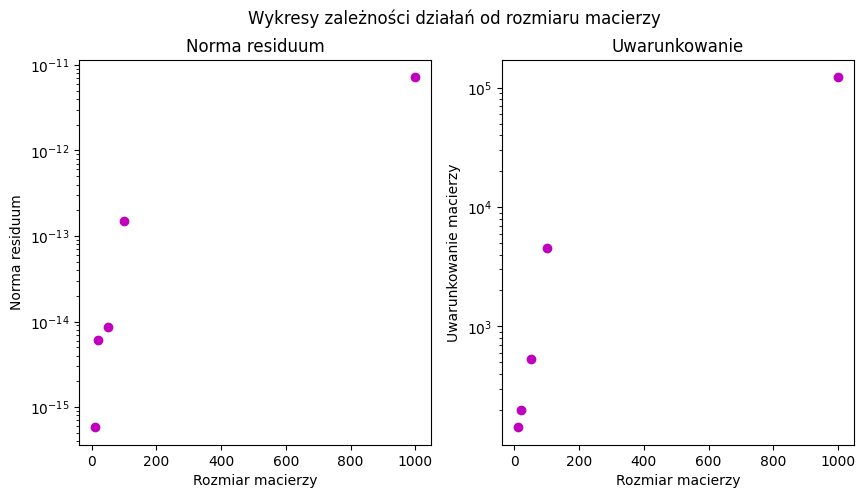

In [20]:
fig1, (s_norm, s_cond) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Wykresy zależności działań od rozmiaru macierzy')

s_norm.plot(m, norm_res, 'mo')
s_norm.set(yscale='log', xlabel='Rozmiar macierzy', ylabel='Norma residuum')
s_norm.set_title('Norma residuum')

s_cond.plot(m, cond_results, 'mo')
s_cond.set(yscale='log', xlabel='Rozmiar macierzy', ylabel='Uwarunkowanie macierzy')
s_cond.set_title('Uwarunkowanie');

In [21]:
# Pomiar czasu
#tworzenie macierzy
create_time_avg = np.zeros(len(m))
create_time_std_dev = np.zeros(len(m))
print('Pomiar czasu tworzenia macierzy:')
for i in range(len(m)):
    print('Rozmiar macierzy: ', m[i])
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o main.random_matrix_Ab(i)
    create_time_avg[i] = saved_timing.average
    create_time_std_dev[i] = saved_timing.stdev
    print('---------------------------------------------', '\n')

Pomiar czasu tworzenia macierzy:
Rozmiar macierzy:  10
Timing: 
The slowest run took 7.30 times longer than the fastest. This could mean that an intermediate result is being cached.
8.31 µs ± 6.27 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  20
Timing: 
The slowest run took 7.60 times longer than the fastest. This could mean that an intermediate result is being cached.
12.9 µs ± 11.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  50
Timing: 
2.56 µs ± 1.01 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  100
Timing: 
2.46 µs ± 796 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  1000
Timing: 
2.58 µs ± 922 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
----------------------------

In [22]:
# rozwiazanie
print('Pomiar czasu rozwiązywania równania macierzowego:')
solve_time_avg = np.zeros(len(m))
solve_time_std_dev = np.zeros(len(m))
for i in range(len(m)):
    print('Rozmiar macierzy: ', m[i])
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(rm_result[i][0], rm_result[i][1])
    solve_time_avg[i] = saved_timing.average
    solve_time_std_dev[i] = saved_timing.stdev
    print('---------------------------------------------', '\n')

Pomiar czasu rozwiązywania równania macierzowego:
Rozmiar macierzy:  10
Timing: 
11.7 µs ± 5.22 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  20
Timing: 
The slowest run took 17.25 times longer than the fastest. This could mean that an intermediate result is being cached.
137 µs ± 201 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  50
Timing: 
12.1 ms ± 2.97 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  100
Timing: 
The slowest run took 328.53 times longer than the fastest. This could mean that an intermediate result is being cached.
10.3 ms ± 12.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  1000
Timing: 
18.2 ms ± 5.2 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------

In [23]:
# norma
print('Pomiar czasu liczenia normu residuum:')
norm_time_avg = np.zeros(len(m))
norm_time_std_dev = np.zeros(len(m))
for i in range(len(m)):
    print('Rozmiar macierzy: ', m[i])
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o main.residual_norm(rm_result[i][0], solve_results[i], rm_result[i][1])
    norm_time_avg[i] = saved_timing.average
    norm_time_std_dev[i] = saved_timing.stdev
    print('---------------------------------------------', '\n')

Pomiar czasu liczenia normu residuum:
Rozmiar macierzy:  10
Timing: 
16.5 µs ± 7.57 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  20
Timing: 
16.6 µs ± 1.64 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  50
Timing: 
16.6 µs ± 4.49 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  100
Timing: 
20 µs ± 1.29 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  1000
Timing: 
316 µs ± 91.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 



In [24]:
# uwarunkowanie
print('Pomiar czasu liczenia uwarunkowania macierzy:')
cond_time_avg = np.zeros(len(m))
cond_time_std_dev = np.zeros(len(m))
for i in range(len(m)):
    print('Rozmiar macierzy: ', m[i])
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.cond(rm_result[i][0])
    cond_time_avg[i] = saved_timing.average
    cond_time_std_dev[i] = saved_timing.stdev
    print('---------------------------------------------', '\n')

Pomiar czasu liczenia uwarunkowania macierzy:
Rozmiar macierzy:  10
Timing: 
42.8 µs ± 8.61 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  20
Timing: 
59.9 µs ± 5.54 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  50
Timing: 
258 µs ± 86 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  100
Timing: 
936 µs ± 145 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 

Rozmiar macierzy:  1000
Timing: 
167 ms ± 8.16 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------- 



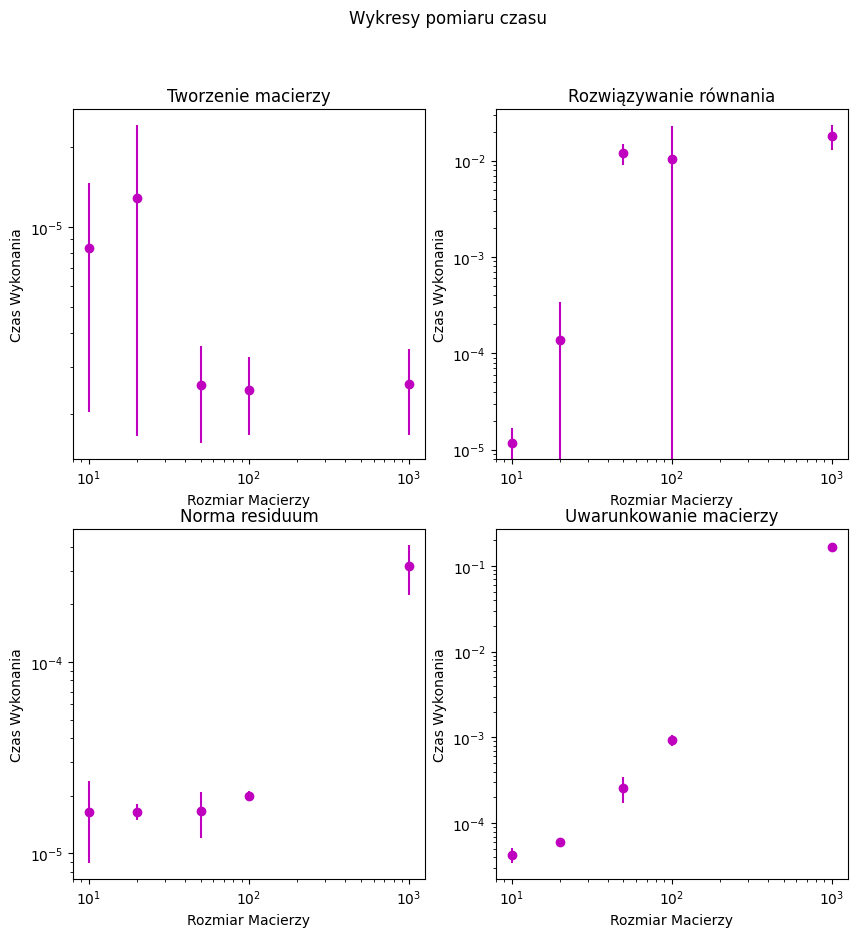

In [25]:
fig0, ((t_create, t_solve), (t_norm, t_cond)) = plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Wykresy pomiaru czasu')

t_create.errorbar(m, create_time_avg, yerr=create_time_std_dev, fmt='mo')
t_create.set(xscale='log', yscale='log', xlabel='Rozmiar Macierzy', ylabel='Czas Wykonania')
t_create.set_title('Tworzenie macierzy')

t_solve.errorbar(m, solve_time_avg, yerr=solve_time_std_dev, fmt='mo')
t_solve.set(xscale='log', yscale='log', xlabel='Rozmiar Macierzy', ylabel='Czas Wykonania')
t_solve.set_title('Rozwiązywanie równania')

t_norm.errorbar(m, norm_time_avg, yerr=norm_time_std_dev, fmt='mo')
t_norm.set(xscale='log', yscale='log', xlabel='Rozmiar Macierzy', ylabel='Czas Wykonania')
t_norm.set_title('Norma residuum')

t_cond.errorbar(m, cond_time_avg, yerr=cond_time_std_dev, fmt='mo')
t_cond.set(xscale='log', yscale='log', xlabel='Rozmiar Macierzy', ylabel='Czas Wykonania')
t_cond.set_title('Uwarunkowanie macierzy');

***Wnioski***
Wraz ze wzrostem rozmiaru macierzy rośnie wartość uwarunkowania macierzy oraz wartość normy residuum. Dzieje się tak ponieważ im większa macierz tym więcej pojawia się w nich błędów zaokrągleń, które mają wpływ na wyniki.
Testy czasowe dość niejednoznacznie wskazują na to, że czas wykonania obliczeń rośnie wraz ze wzrostem rozmiaru macierzy, co według mnie jest zgodne z rzeczywistością, ponieważ im większa macierz, tym więcej obliczeń jest do wykonania.

***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [26]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])

# Użycie rozkładu SVD na macierzy A
U, S, V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)

print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))
print(main.order_sing_value(10, 10, 'gre'))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[2.00455843e+09 9.27335257e+00 8.30695227e+00 8.10643469e+00
 7.64439939e+00 6.06387464e+00 5.16717228e+00 4.56589771e+00
 2.94456048e+00 1.90944512e+00]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [27]:
S1 = np.logspace(100, 1, num=3)

- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [28]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0] + 100

- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [29]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0] - 100



W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [30]:
A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
U, S, V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
print('Macierz pierwotna:')
print(A)

print('Macierz na podstawie wartości S1:')
print(A1)

print('Macierz na podstawie wartości S2:')
print(A2)

print('Macierz na podstawie wartości S3:')
print(A3)

Macierz pierwotna:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz na podstawie wartości S1:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S2:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S3:
[[-4.02045290e+99  3.94198798e+99  5.91298198e+99]
 [ 9.14289726e+99  1.91685719e+99  2.87528579e+99]
 [-4.93343857e+98  3.39935582e+99  5.09903374e+99]]


In [31]:
log_v = []
for i in m:
    log_v.append(main.log_sing_value(i, 1, 10))

max_v = []
for i in m:
    max_v.append(main.order_sing_value(i, 5))

min_v = []
for i in m:
    min_v.append(main.order_sing_value(i, -5))

svd_results_log_v = []
svd_results_max_v = []
svd_results_min_v = []
for i in range(len(rm_result)):
    svd_results_log_v.append(main.create_matrix_from_A(rm_result[i][0], log_v[i]))
    svd_results_max_v.append(main.create_matrix_from_A(rm_result[i][0], max_v[i]))
    svd_results_min_v.append(main.create_matrix_from_A(rm_result[i][0], min_v[i]))

cond_log_v_rec = [linalg.cond(i) for i in svd_results_log_v]
cond_max_v_rec = [linalg.cond(i) for i in svd_results_max_v]
cond_min_v_rec = [linalg.cond(i) for i in svd_results_min_v]

norm_log_v_rec = []
norm_max_v_rec = []
norm_min_v_rec = []

for i in range(len(svd_results_log_v)):
    norm_log_v_rec.append(
        main.residual_norm(svd_results_log_v[i], linalg.solve(svd_results_log_v[i], rm_result[i][1]), rm_result[i][1]))
    norm_max_v_rec.append(
        main.residual_norm(svd_results_max_v[i], linalg.solve(svd_results_max_v[i], rm_result[i][1]), rm_result[i][1]))
    norm_min_v_rec.append(
        main.residual_norm(svd_results_min_v[i], linalg.solve(svd_results_min_v[i], rm_result[i][1]), rm_result[i][1]))

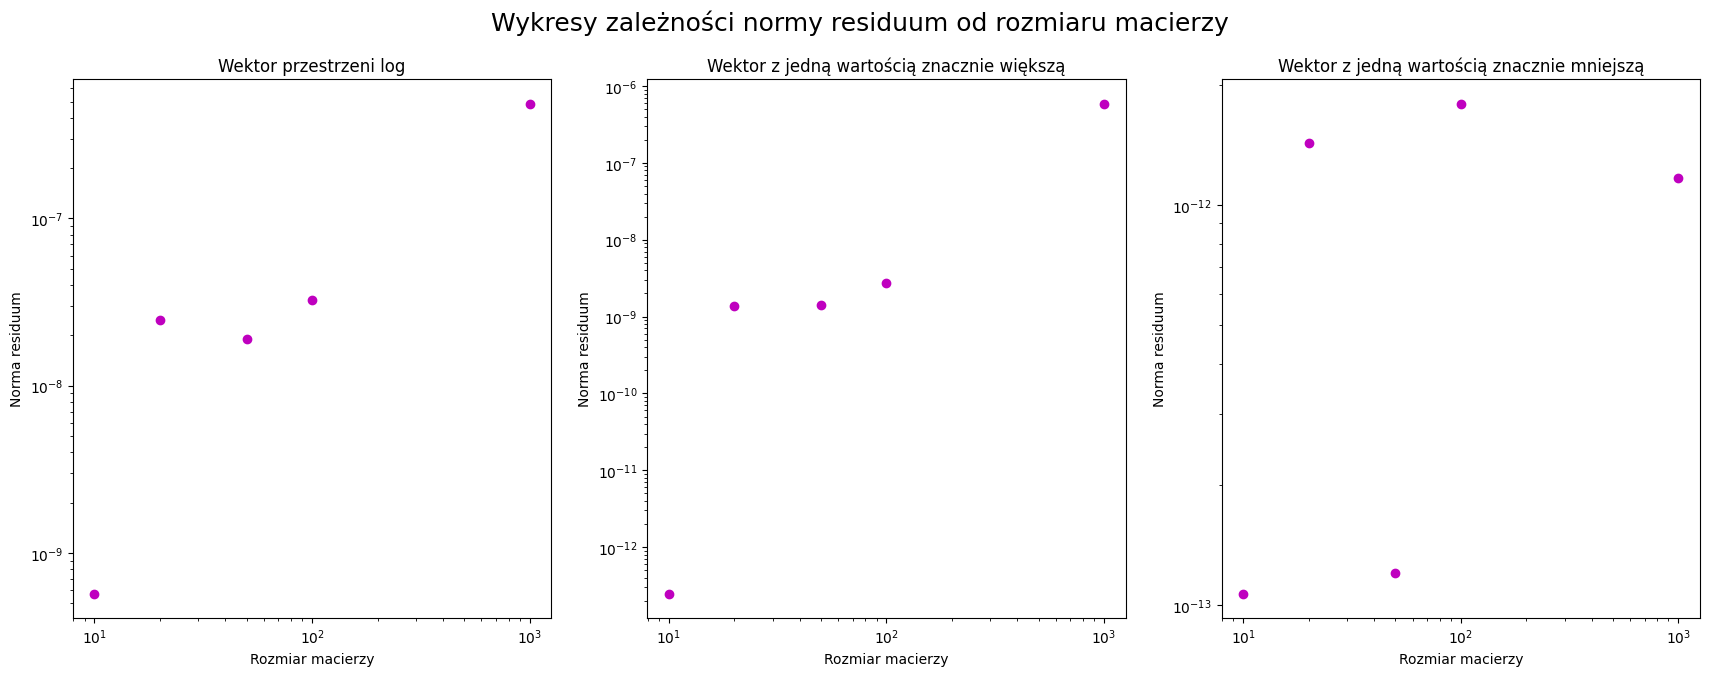

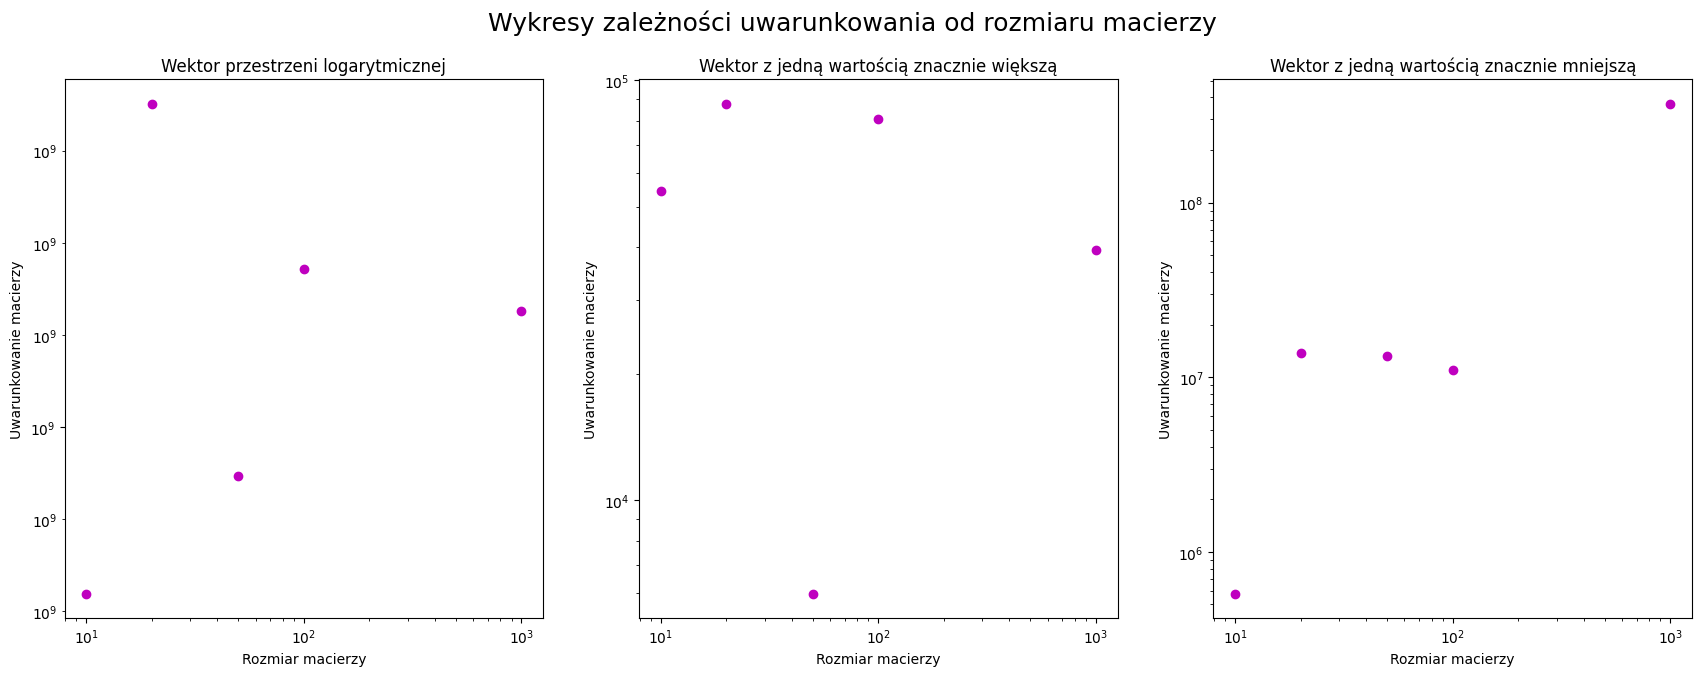

In [32]:
fig1, (norm_log, norm_max, norm_min) = plt.subplots(1, 3, figsize=(21, 7))
plt.suptitle('Wykresy zależności normy residuum od rozmiaru macierzy', fontsize=18)

norm_log.plot(m, norm_log_v_rec, 'mo')
norm_log.set(xscale='log', yscale='log', xlabel='Rozmiar macierzy', ylabel='Norma residuum')
norm_log.set_title('Wektor przestrzeni log')

norm_max.plot(m, norm_min_v_rec, 'mo')
norm_max.set(xscale='log', yscale='log', xlabel='Rozmiar macierzy', ylabel='Norma residuum')
norm_max.set_title('Wektor z jedną wartością znacznie większą')

norm_min.plot(m, norm_max_v_rec, 'mo')
norm_min.set(xscale='log', yscale='log', xlabel='Rozmiar macierzy', ylabel='Norma residuum')
norm_min.set_title('Wektor z jedną wartością znacznie mniejszą')

fig2, (cond_log, cond_max, cond_min) = plt.subplots(1, 3, figsize=(21, 7))
plt.suptitle('Wykresy zależności uwarunkowania od rozmiaru macierzy', fontsize=18)

cond_log.plot(m, cond_log_v_rec, 'mo')
cond_log.set(xscale='log', yscale='log', xlabel='Rozmiar macierzy', ylabel='Uwarunkowanie macierzy')
cond_log.set_title('Wektor przestrzeni logarytmicznej')

cond_max.plot(m, cond_max_v_rec, 'mo', label='Uwarunkowanie dla wektora jednej wartości większej')
cond_max.set(xscale='log', yscale='log', xlabel='Rozmiar macierzy', ylabel='Uwarunkowanie macierzy')
cond_max.set_title('Wektor z jedną wartością znacznie większą')

cond_min.plot(m, cond_min_v_rec, 'mo', label='Uwarunkowanie dla wektora jednej wartości mniejszej')
cond_min.set(xscale='log', yscale='log', xlabel='Rozmiar macierzy', ylabel='Uwarunkowanie macierzy')
cond_min.set_title('Wektor z jedną wartością znacznie mniejszą');



3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




***Wnioski***
Wykresy przedstawiają zależność normy residuum i uwarunkowania macierzy dla jednej z trzech wartości singularnych. Logarytmicznych, jednej wartości znacznie większej oraz jednej wartości znacznie mniejszej. Wartości tych wyników przy kilkukrotnych obiczeniach dość mocno wachają się, więc według mnie nie można w jednoznaczny sposób wyciągnąć wniosków opartych na powyższych obliczeniach.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)